In [225]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install geopandas
#!pip install descartes
#!conda install -c conda-forge geoplot

%config IPCompleter.greedy=True
%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [226]:
raw_data = pd.read_csv('./ToChangeKeywordsAndLocations/withoutEncoding.csv')
raw_data.head()

,id,keyword,location,text,target
0,1,earthquake,us,Our Deeds are the Reason of this #earthquake M...,1
1,4,fire,la,Forest fire near La Ronge Sask. Canada,1
2,5,evacuation,unknown,All residents asked to 'shelter in place' are ...,1
3,6,evacuation,california,"13,000 people receive #wildfires evacuation or...",1
4,7,smoke,alaska,Just got sent this photo from Ruby #Alaska as ...,1


In [227]:
raw_data.groupby('location').agg({'target':['count','sum']})[('target','sum')].nlargest(10) #Top ten ubicaciones con mas tweets verdaderos

location
unknown          545
usa               70
california        51
india             31
united states     29
nigeria           28
japan             24
world             23
us                22
mumbai            21
Name: (target, sum), dtype: int64

In [228]:
data_grouped_location = raw_data.groupby('location').agg({'target':['mean','count','sum']})
data_grouped_location.columns = ['target_mean','target_count','target_sum']
data_grouped_location.sort_values(by='target_sum',ascending=False)

,target_mean,target_count,target_sum
location,,,
unknown,0.32,1680,545
usa,0.63,111,70
california,0.80,64,51
india,0.82,38,31
united states,0.55,53,29
...,...,...,...
"irving , texas",0.00,1,0
"island lake, il",0.00,1,0
it's a journey,0.00,1,0


In [229]:
data_grouped_location['target_count'].describe()

count               3,332.00
mean                    2.28
std                    29.33
min                     1.00
25%                     1.00
50%                     1.00
75%                     1.00
max                 1,680.00
Name: target_count, dtype: float64

In [230]:
data_grouped_location = data_grouped_location.drop(data_grouped_location[data_grouped_location['target_count'] < 10].index)

Text(0, 0.5, 'Location')

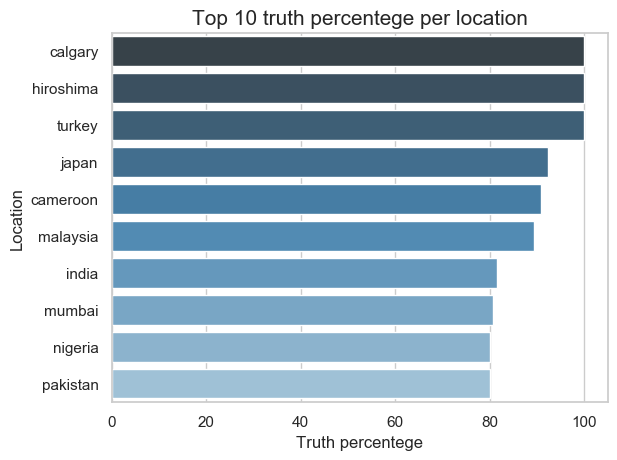

In [231]:
index_most_tweeted = data_grouped_location['target_mean'].nlargest(10).index

ax = sns.barplot(x=data_grouped_location.loc[index_most_tweeted,'target_mean'] * 100,y=index_most_tweeted,orient='h',\
               palette="Blues_d")
ax.set_title("Top 10 truth percentege per location", fontsize = 15)
ax.set_xlabel("Truth percentege", fontsize = 12)
ax.set_ylabel("Location", fontsize = 12)

Text(0, 0.5, 'Location')

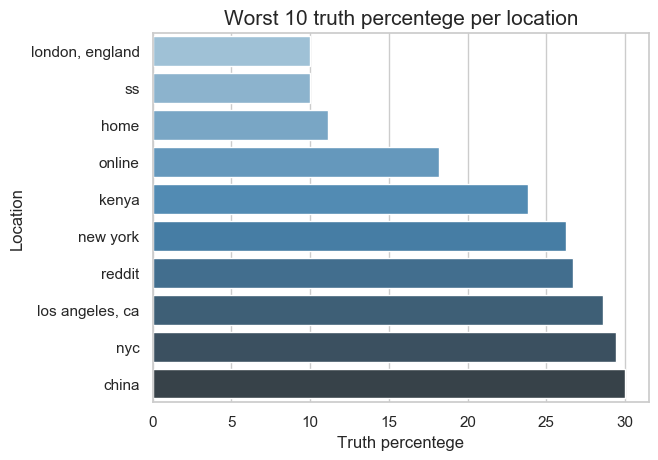

In [232]:
ax = sns.barplot(x=data_grouped_location['target_mean'].nsmallest(10) * 100,y=data_grouped_location['target_mean'].nsmallest(10).index,orient='h',\
              palette=reversed(sns.color_palette('Blues_d', n_colors=10)))

ax.set_title("Worst 10 truth percentege per location", fontsize = 15)
ax.set_xlabel("Truth percentege", fontsize = 12)
ax.set_ylabel("Location", fontsize = 12)

In [234]:
data_grouped_location.loc['los angeles, ca',:]

target_mean                    0.29
target_count                  28.00
target_sum                     8.00
Name: los angeles, ca, dtype: float64

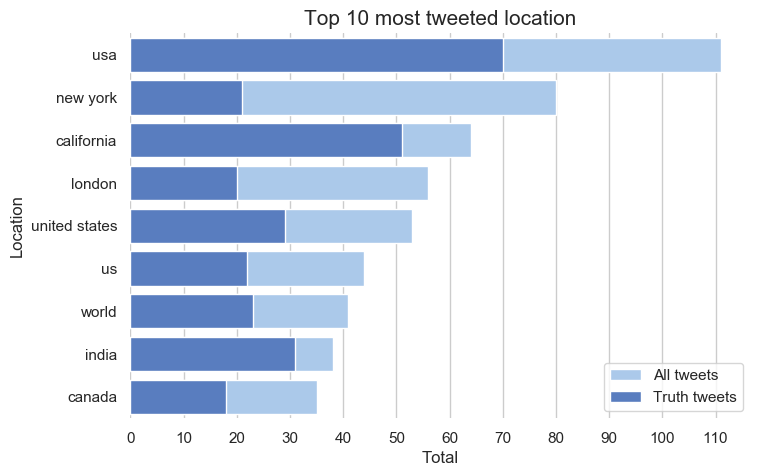

In [224]:
index_most_tweeted = data_grouped_location['target_count'].nlargest(10).index
index_most_tweeted = index_most_tweeted.drop('unknown') #Ya que en la limpieza de datos determinamos que son valores desconocidos
f, ax = plt.subplots(figsize=(8, 5))

sns.set_color_codes("pastel")
sns.barplot(x=data_grouped_location.loc[index_most_tweeted,'target_count'], y=index_most_tweeted,
            label="All tweets", color="b")

sns.set_color_codes("muted")
sns.barplot(x=data_grouped_location.loc[index_most_tweeted,'target_sum'], y=index_most_tweeted,
            label="Truth tweets", color="b")

# Add a legend and informative axis label
ax.set_title("Top 10 most tweeted location", fontsize = 15)
ax.set_ylabel("Location", fontsize = 12)
# ax.set_xlabel("Truth percentege", fontsize = 12)
ax.legend(ncol=1, loc="lower right", frameon=True)
ax.set(ylabel="Location",xlabel="Total")
sns.despine(left=True, bottom=True)
ax.set_xticks(np.arange(0,120,10))

Text(0.5, 0, 'Number of times mentioned')

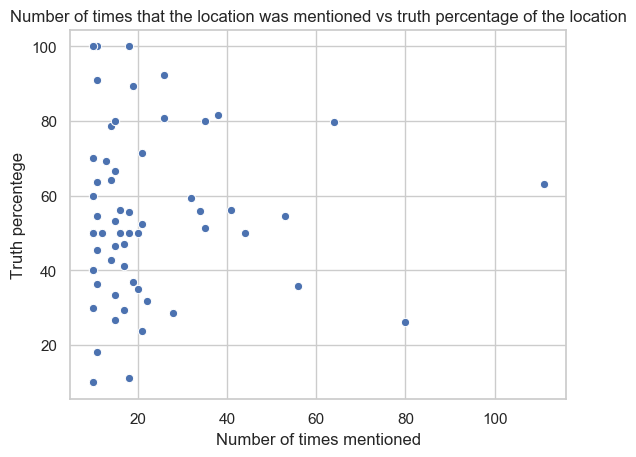

In [213]:
# no pareciera haber relacion entre la cantidad de veces mencionada con su verdad
data_grouped_location = data_grouped_location.drop(data_grouped_location.loc[data_grouped_location.index == 'unknown'].index)
ax = sns.scatterplot(x=data_grouped_location['target_count'],y=data_grouped_location['target_mean']*100)
ax.set_title("Number of times that the location was mentioned vs truth percentage of the location", fontsize = 12)
ax.set_ylabel("Truth percentege", fontsize = 12)
ax.set_xlabel("Number of times mentioned", fontsize = 12)

Text(0.5, 0, 'Amount of veracity per location')

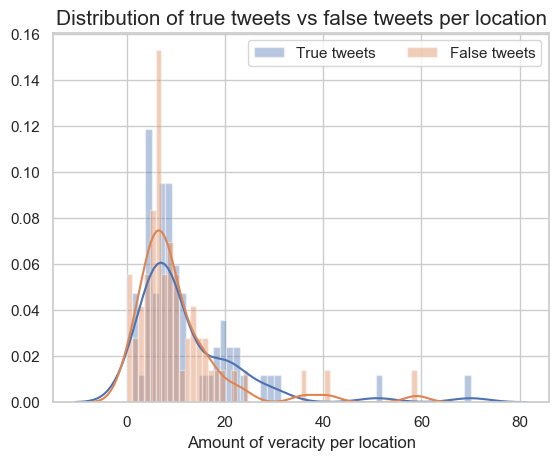

In [111]:
# distribucion de locations verdaderas vs distribucion de location falsas
ax = sns.distplot(data_grouped_location['target_sum'],bins=50,hist=True,label="True tweets") #tweets verdaderos por location
ax = sns.distplot(data_grouped_location['target_count'] - data_grouped_location['target_sum'],bins=50,hist=True,label="False tweets") #tweets falsos por location
ax.set_title("Distribution of true tweets vs false tweets per location", fontsize = 15)
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set_xlabel("Amount of veracity per location", fontsize = 12)

In [13]:
#Getting the data for location-keyword relationshp analysis
twitterCleanData = pd.read_csv('./ToChangeKeywordsAndLocations/withoutEncoding.csv')
twitterKeywordAndLocation = twitterCleanData[['keyword', 'location']]
#Filtering those values that are missing
twitterKeywordAndLocation = twitterKeywordAndLocation[twitterKeywordAndLocation['keyword'] != 'unknown']
twitterKeywordAndLocation = twitterKeywordAndLocation[twitterKeywordAndLocation['location'] != 'unknown']
twitterKeywordAndLocation.head()

,keyword,location
0,earthquake,us
1,fire,la
3,evacuation,california
4,smoke,alaska
5,fire,california


In [14]:
#Some of DataFrame's properties
twitterKeywordAndLocation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5931 entries, 0 to 7612
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   5931 non-null   object
 1   location  5931 non-null   object
dtypes: object(2)
memory usage: 139.0+ KB


In [15]:
#Changing DataFrmae columns data types in order to apply some operations on them 

twitterKeywordAndLocation['keyword'] = twitterKeywordAndLocation['keyword'].astype('string')
twitterKeywordAndLocation['location'] = twitterKeywordAndLocation['location'].astype('string')

In [16]:
#Visualization

#Counter of keywords
twitterKeywordAndLocation['counter'] = 1
twitterKeywordAndLocation

,keyword,location,counter
0,earthquake,us,1
1,fire,la,1
3,evacuation,california,1
4,smoke,alaska,1
5,fire,california,1
...,...,...,...
7603,quarantine,alabama,1
7606,suicide bomber,world,1
7607,tornado,oklahoma,1
7609,wild fires,california,1


In [17]:
#Number of keywords per location
keywordsPerLocation = twitterKeywordAndLocation.groupby('location')\
.agg({'counter' : 'sum'})
keywordsPerLocation = keywordsPerLocation.reset_index()
keywordsPerLocation

,location,counter
0,"#1 vacation destination,hawaii",1
1,#937??#734,1
2,#????? libya#,1
3,#blacklivesmatter,1
4,#bossnation!,1
...,...,...
3326,"ìït: 42.910975,-78.865828",1
3327,"ìït: 43.631838,-79.55807",1
3328,"ìït: 6.4682,3.18287",1
3329,"ìït: 6.488400524109015,3.352798039832285",1


In [18]:
top20KeywordsPerLocation = keywordsPerLocation.nlargest(20, 'counter')
top20KeywordsPerLocation

,location,counter
3021,usa,111
2011,new york,80
589,california,64
1676,london,55
2996,united states,53
3016,us,44
3232,world,41
1398,india,38
605,canada,35
2048,nigeria,35


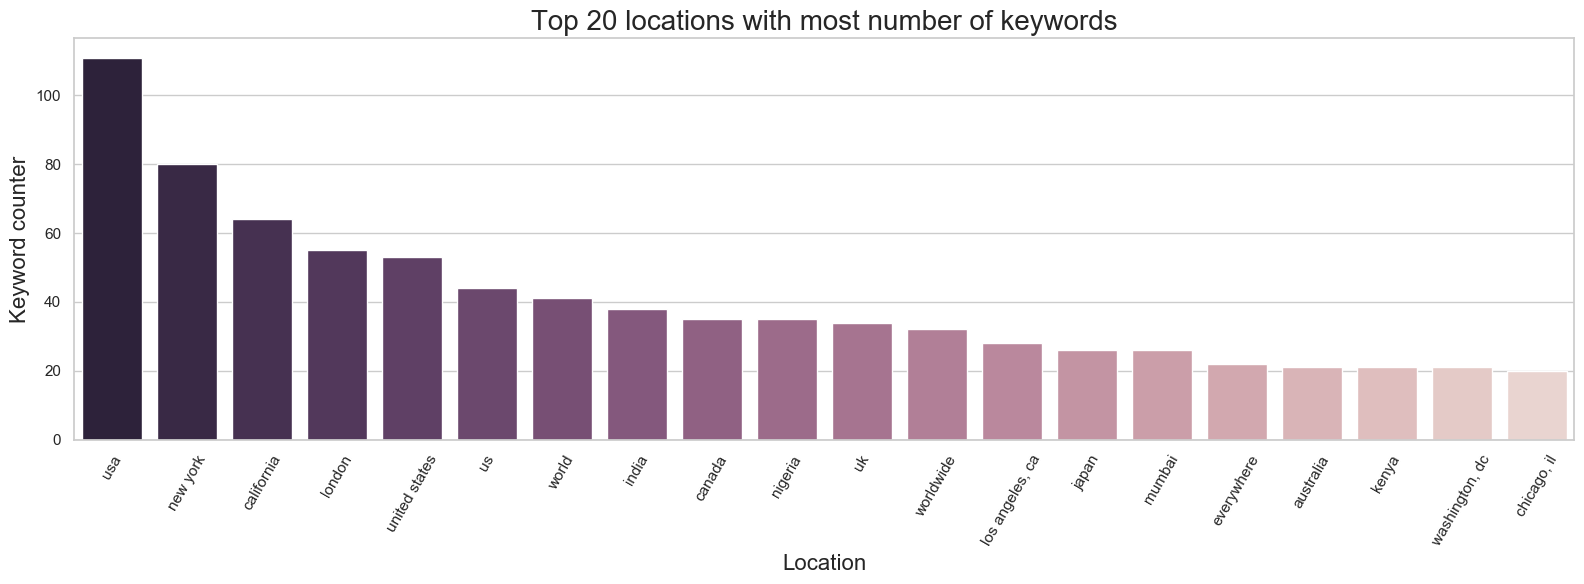

In [19]:
#barplot

ax = sns.barplot(x = 'location', y = 'counter', data = top20KeywordsPerLocation,\
                palette = sns.cubehelix_palette(20, reverse = True))
ax.set_ylabel('Keyword counter', size = 16)
ax.set_xlabel('Location', size = 16)
ax.set_title('Top 20 locations with most number of keywords', size = 20)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
ax.figure.set_size_inches(16, 6)
plt.tight_layout()
ax.get_figure().savefig("Top20LocationsWithMosthKeywords.png")

In [ ]:
#Cleaning the data
#Dropping those locations that don't have a significant number of keywords
#For that, first we see the average
keywordMean = keywordsPerLocation['counter'].mean()
keywordMean = int(keywordMean)
keywordMean

In [ ]:
#Then, we filter
keywordsPerLocation = keywordsPerLocation[keywordsPerLocation['counter'] > keywordMean]
keywordsPerLocation.describe()

In [ ]:
#Most popular keywords
keywordsPopular = twitterKeywordAndLocation.groupby('keyword')\
.agg({'counter' : 'sum'})
keywordsPopular = keywordsPopular.reset_index()
top20KeywordsPopular = keywordsPopular.nlargest(20, 'counter')

In [ ]:
#barplot

ax = sns.barplot(x = 'keyword', y = 'counter', data = top20KeywordsPopular,\
                palette = sns.cubehelix_palette(30, start=.5, rot = -.75, reverse = True))
ax.set_ylabel('Occurrence of keywords in different tweets', size = 12)
ax.set_xlabel('Keyword', size = 16)
ax.set_title('Top 20 most popular keywords', size = 20)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
ax.figure.set_size_inches(16, 6)
plt.tight_layout()
ax.get_figure().savefig("Top20MostPopularKeywords.png", optimize = True)

In [ ]:
#Removing non representative samples
keywordsPopularMean = keywordsPopular.mean()
keywordsPopularMean = int(keywordsPopularMean)
keywordsPopular = keywordsPopular[keywordsPopular['counter'] > keywordsPopularMean]
keywordsPopular.describe()

In [ ]:
#Comparison between the most popular keywords and locations associated to those keywords
locationAndKeyword = pd.merge(twitterKeywordAndLocation, keywordsPopular, on = 'keyword')
locationAndKeyword.head()

In [ ]:
locationAndKeyword.drop(['counter_x', 'counter_y'], axis = 1, inplace = True)
locationAndKeyword['counter'] = 1
locationAndKeyword.head()

In [ ]:
locationAndKeyword = locationAndKeyword.groupby(['keyword', 'location'])\
.agg({'counter' : 'sum'})
locationAndKeyword = locationAndKeyword.sort_values(by = 'counter', ascending = False)
locationAndKeyword = locationAndKeyword.reset_index()
locationAndKeyword

In [ ]:
#scatterplot

g = sns.relplot(x = 'keyword', y = 'location', hue = 'counter',\
            s = 150, alpha = .5, height = 5, data = locationAndKeyword.head(20),\
               palette = "winter_r")

g.ax.set_title('Locations per popular keyword', fontsize = 20)
g.set_xlabels('Keyword',fontsize = 18)
g.set_ylabels('Location', fontsize = 18)
g.ax.set_xticklabels(g.ax.get_xticklabels(), rotation = 80)
g.ax.figure.set_size_inches(10, 6)
plt.tight_layout()
g.ax.get_figure().savefig("LocationPeroPopularKeyword.png")

In [ ]:
tweetsInfo = pd.read_csv('./train.csv', encoding = 'latin-1', usecols = ['text', 'target'])
tweetsInfo.head()

In [ ]:
#Starting the analisis for the relation between keywords and hashtags
hashForKeywordsAndHashtags = {}
csvFormatted = pd.read_csv('./ToChangeKeywordsAndLocations/withoutEncoding.csv', usecols = ['keyword', 'text', 'target'])
csvFormatted = csvFormatted[csvFormatted['keyword'] != 'unknown']
csvFormatted['keyword'].value_counts().head(20)

In [ ]:
def sumHashtagIfNedeed(line, keyword, hashOfKeywords):
    for word in line.split():
        if not word.startswith('#'):
            continue
        word = word.lower().lstrip('#')
        if keyword not in hashOfKeywords:
            hashOfKeywords[keyword] = {}
        hashOfKeywords[keyword][word.lstrip('#')] = hashOfKeywords[keyword].get(word.lstrip('#'), 0) + 1

In [ ]:
csvFormatted.apply(lambda x: sumHashtagIfNedeed(x['text'], x['keyword'], hashForKeywordsAndHashtags), axis = 1)

In [ ]:
d = {'keyword': [], 'amount': []}
for key in hashForKeywordsAndHashtags:
    d['keyword'].append(key)
    d['amount'].append(sum(hashForKeywordsAndHashtags[key].values()))
keywordDf = pd.DataFrame(d, columns =['keyword', 'amount'])
keywordDf = keywordDf.sort_values(by = ['amount']).tail(20)
keywordDf

In [ ]:
ax = sns.barplot(x = 'keyword', y = 'amount', data = keywordDf);
ax.set_title('Keyword and amount of hashtags', fontsize=20)
ax.set_xlabel('Keywords', fontsize = 18)
ax.set_ylabel('Amount of hashtags used', fontsize = 18)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.tick_params(axis="x", labelsize='large')
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)
ax.figure.set_size_inches(20, 8);
plt.show()

In [ ]:
csvWithOnlyKeywordTarget = csvFormatted.drop('text', 1)
csvWithOnlyKeywordTarget = csvWithOnlyKeywordTarget.groupby(['keyword']).agg({'target': ['mean', 'count']})
csvWithOnlyKeywordTarget.columns = csvWithOnlyKeywordTarget.columns.get_level_values(0) + '_' + csvWithOnlyKeywordTarget.columns.get_level_values(1)
csvWithOnlyKeywordTarget = csvWithOnlyKeywordTarget.sort_values(by = ['target_mean']).reset_index() #Hasta aca tengo TODOS los valores de verdad
csvWithOnlyKeywordTarget = pd.merge(csvWithOnlyKeywordTarget, keywordDf, on='keyword', how='inner')
csvWithOnlyKeywordTarget.head(20)

In [ ]:
ax = sns.barplot(x = 'keyword', y = 'target_mean', data = csvWithOnlyKeywordTarget);
ax.set_title('Keyword and veracity value', fontsize=20)
ax.set_xlabel('Keywords', fontsize = 18)
ax.set_ylabel('Veracity', fontsize = 18)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.tick_params(axis="x", labelsize='large')
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)
ax.figure.set_size_inches(20, 8);
plt.show()

In [ ]:
tweetsInfo['tweet_length'] = tweetsInfo.text.str.len()

In [ ]:
def validUser(userName):
    if '@' in userName:
        user = getter(userName, '@')
        length = len(user)
        if (length > 1 and length <= 16):
            for char in user[1:]:
                if not(char.isalnum() or char == '_'): return False
            return True
    return False

In [ ]:
def validLink(link):
    type1 = 'https://'
    type2 = 'http://'
    if type1 in link and len(link) > 9: return True
    if type2 in link and len(link) > 8: return True
    return False

In [ ]:
def validHashtag(hashtag):
    if '#' in hashtag:
        hashtag = getter(hashtag, '#')
        hashtag = hashtag[1:]
        return hashtag.isalnum()
    return False

In [ ]:
#Function to analyze the elements (#. @, links) of the tweet
def analyzeTweets(text):
    result = [0,0,0] #number of usersTagged, hashtags and links
    text = text.split()
    for word in text:
        if validUser(word): result[0] += 1
        elif validHashtag(word): result[1] += 1
        elif validLink(word): result[2] += 1
    return result

In [ ]:
#This function creates a new DF, char = # or @
#dicc is a dictionary, key: @user or #hashtag, value: [number of occurrence, number of true targets]
#func1 get the hashtag or user correctly
#func2 cheks if the result of func1 is correct
#text its a combination of two columns, text and target, the target is in the last position always
def dataFrameMaker(text, dicc, char, func1, func2):
    text = text.split()
    target = int(text[-1])
    for word in text:
        if char in word:
            auxString = func1(word, char)  #auxString could be a @user or a #hashtag
            if func2(auxString):
                auxString = auxString.lower()
                auxList = dicc[auxString] = dicc.get(auxString, [0,0])
                auxList[0] += 1
                auxList[1] += target

In [ ]:
#Col1: column of the DF to filter
#condition: condition to filter
#col2: must be of type str
#col3: its type will be transform into str
#return a Serie with the combination of col2 and col3
def colsCombination(col1, condition, col2, col3):
        filterCondition = tweetsInfo[col1] > condition
        strCol2 = tweetsInfo[filterCondition][col2]
        strCol3 = tweetsInfo[filterCondition][col3]
        strCol3 = strCol3.astype(str)
        result = strCol2 + ' ' + strCol3
        return result

In [ ]:
#Gets the hashtag or user
def getter(text, char):
    pos = text.find(char)
    text = text[pos:]
    #Some users or hashtags finish with : or .
    if text.endswith(':') or text.endswith('.'):
        text = text[:-1]
    return text

In [ ]:
#Col1: column of the DF to filter
#condition: condition to filter
#col2: must be of type str
#col3: its type will be transform into str
#return a Serie with the combination of col2 and col3
def colsCombination(col1, condition, col2, col3):
        filterCondition = tweetsInfo[col1] > condition
        strCol2 = tweetsInfo[filterCondition][col2]
        strCol3 = tweetsInfo[filterCondition][col3]
        strCol3 = strCol3.astype(str)
        result = strCol2 + ' ' + strCol3
        return result

In [ ]:
def getInfo(dataList, pos):
    return dataList[pos]

In [ ]:
#Aux column to get the result
tweetsInfo['aux_column'] = tweetsInfo.text.apply(analyzeTweets)

tweetsInfo['users_tagged'] = tweetsInfo.aux_column.apply(getInfo,args=(0,))
tweetsInfo['hashtags'] = tweetsInfo.aux_column.apply(getInfo,args=(1,))
tweetsInfo['links'] = tweetsInfo.aux_column.apply(getInfo,args=(2,))

del tweetsInfo['aux_column']
tweetsInfo.head()

In [ ]:
hashtagFrame = tweetsInfo[['tweet_length','hashtags']]
hashtagFrame['tweet_element'] = 'hashtag'

linksFrame = tweetsInfo[['tweet_length','links']]
linksFrame['tweet_element'] = 'link'

usersFrame = tweetsInfo[['tweet_length','users_tagged']]
usersFrame['tweet_element'] = 'user_tagged'

hashtagFrame.rename(columns={'hashtags':'Amount'},inplace=True)
linksFrame.rename(columns={'links':'Amount'},inplace=True)
usersFrame.rename(columns={'users_tagged':'Amount'},inplace=True)

appendedElements = hashtagFrame.append(linksFrame)
appendedElements = appendedElements.append(usersFrame)

groupedElements = appendedElements.groupby(['tweet_element','Amount']).agg({'tweet_length':['mean','count']})
labels0 = groupedElements.columns.get_level_values(0)
labels1 = groupedElements.columns.get_level_values(1)
groupedElements.columns = labels0 + '_' + labels1
groupedElements.reset_index(inplace=True)
groupedElements.rename(columns={'tweet_length_count':'occurrence', 'tweet_element':'Tweet element',\
                               'tweet_length_mean':'Average tweet length'}, inplace=True)
groupedElements

plot = sns.lmplot(x="Average tweet length", y="Amount", col="Tweet element", hue="Tweet element", data=groupedElements, col_wrap=2, ci=None, palette="muted", height=4,\
         scatter_kws={"s": 50, "alpha": 1},legend = True)

# add annotations one by one with a loop
auxCont = 0
auxDicc = {0:'hashtag',1:'link',2:'user_tagged'}
for ax in plot.axes:
    element = auxDicc[auxCont]
    for line in range(0, groupedElements.shape[0]):
            ax.set_yticks([0,2,4,6,8,10,12,14])
            if groupedElements['Tweet element'][line] == element:
                ax.text(groupedElements['Average tweet length'][line]+0.30, groupedElements.Amount[line], groupedElements.occurrence[line],\
                horizontalalignment='left', size='small', color='black', weight='semibold')
    auxCont += 1

In [ ]:
#Links boxplot
colors = {0: 'mistyrose', 1: 'salmon', 2: 'indianred', 3: 'firebrick'}
linksData = tweetsInfo[['tweet_length','links']][tweetsInfo.links <= 3]
ax = sns.boxplot(x = 'links', y = 'tweet_length', data = linksData, palette = colors)
ax.set_title('Use of links according to length of tweets',fontsize = 16)
ax.set_ylabel('Tweet length (amount of characters)', fontsize = 14)
ax.set_xlabel('Number of links per tweet', fontsize = 14);

In [ ]:
#Users tagged boxplot
usersTaggedData = tweetsInfo[['tweet_length','users_tagged']][tweetsInfo.users_tagged < 5]
ax = sns.boxplot(x = 'users_tagged', y = 'tweet_length', data = usersTaggedData)
ax.set_title('Use of tags according to length of tweets',fontsize = 16)
ax.set_ylabel('Tweet length (amount of characters)', fontsize = 14)
ax.set_xlabel('Number of tags per tweet', fontsize = 14);

In [ ]:
#Building the usersTagged df
usersDicc = {}
tweetsInfoTags = colsCombination('users_tagged',0,'text','target')
tweetsInfoTags.apply(dataFrameMaker, args = (usersDicc,'@',getter,validUser))

In [ ]:
usersSerie = pd.Series(usersDicc)
usersDataFrame = usersSerie.to_frame(name='auxCol')
usersDataFrame['occurrence'] = usersDataFrame.auxCol.apply(getInfo,args=(0,))
usersDataFrame['target_sum'] = usersDataFrame.auxCol.apply(getInfo,args=(1,))
del usersDataFrame['auxCol']
usersDataFrame.head()

In [ ]:
#Top 10 mentioned users barplot
topMentions = usersDataFrame[usersDataFrame.occurrence > 5]
topMentionUsers = topMentions.occurrence.nlargest(10).index

ax = sns.barplot(x=topMentionUsers, y = topMentions.loc[topMentionUsers,'occurrence'],color='sandybrown',label='All mentions')
sns.barplot(x=topMentionUsers, y = topMentions.loc[topMentionUsers,'target_sum'], color='darkorange',label='True tweets')

ax.set_title('Top 10: Mentioned users', fontsize=20)
ax.set_xlabel('Users', fontsize = 18)
ax.set_ylabel('Total mentions', fontsize = 18)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.tick_params(axis="both", labelsize=16)
ax.legend(ncol=2, loc='best', frameon=True);
ax.figure.set_size_inches(12, 6);

In [ ]:
#Building the hashtags df
hashtagsDicc = {}
tweetsInfoHashtags = colsCombination('hashtags',0,'text','target')
tweetsInfoHashtags.apply(dataFrameMaker, args = (hashtagsDicc,'#',getter,validHashtag))

In [ ]:
hashtagsSerie = pd.Series(hashtagsDicc)
hashtagsDataFrame = hashtagsSerie.to_frame(name='auxCol')
hashtagsDataFrame['occurrence'] = hashtagsDataFrame.auxCol.apply(getInfo, args=(0,))
hashtagsDataFrame['target_sum'] = hashtagsDataFrame.auxCol.apply(getInfo, args=(1,))
del hashtagsDataFrame['auxCol']
hashtagsDataFrame.head()

In [ ]:
#Trending topics barplot
trendingTopics = hashtagsDataFrame[hashtagsDataFrame.occurrence > 5]
trendingTopicHashtags = trendingTopics.occurrence.nlargest(10).index

ax = sns.barplot(x=trendingTopicHashtags, y = trendingTopics.loc[trendingTopicHashtags,'occurrence'],color='sandybrown',label='Hashtag occurrence')
sns.barplot(x=trendingTopicHashtags, y = trendingTopics.loc[trendingTopicHashtags,'target_sum'], color='darkorange',label='True tweets')

ax.set_title('Trending topics', fontsize=20)
ax.set_xlabel('Hashtags', fontsize = 18)
ax.set_ylabel('Total mentions', fontsize = 18)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.tick_params(axis="both", labelsize=16)
ax.legend(ncol=2, loc='best', frameon=True)
ax.figure.set_size_inches(12, 6);

In [ ]:
grouped = tweetsInfo.groupby('tweet_length').agg({'target':'sum','text':'count','hashtags':'sum','users_tagged':'sum','links':'sum'})
grouped['total_elements'] = grouped.links + grouped.hashtags + grouped.users_tagged
grouped['truth_percentage'] = (grouped.target / grouped.text) * 100
grouped.index.rename('lengths', inplace = True)

In [ ]:
max_quantity, min_quantity = grouped.text.max(), grouped.text.min()
max_quantity, min_quantity

In [ ]:
grouped.drop(grouped[grouped.text <= 10].index, inplace=True)
grouped.reset_index(inplace = True)
grouped.head()

In [ ]:
#Regplot 1
ax = sns.regplot(x='lengths', y='truth_percentage', data=grouped,\
                line_kws = {'color':'lightsalmon','alpha':0.5,'lw':3},\
                color = 'brown')

ax.set_xlabel('Tweet lengths(amount of characters)', fontsize = 14)
ax.set_ylabel('Percentage of veracity (%)', fontsize = 14)
ax.set_yticks(np.arange(0,110,10))
ax.set_title('Tweet length vs veracity', fontsize=16)
ax.figure.set_size_inches(14,4);

In [ ]:
#Natural disasters
df1 = pd.read_csv('./ToChangeKeywordsAndLocations/withoutEncoding.csv', usecols=['id','keyword','location'])
df2 = tweetsInfo
disastersDF = pd.concat([df1,df2], axis = 1)
disastersDF.head()

In [ ]:
#Some auxiliar functions
def getSeriesElements(serie, setElements):
    for element in serie.values: #Element is a string always
        if '/' in element:
            element = element.split('/')
            for elemt in element: setElements.add(elemt.lower())
                
        else: setElements.add(element.lower())

In [ ]:
#the info is between position 2 and 6, both included
def obtainInfo(infoList):
    naturalDisasters = {} #Key: group, value: {subgroups}
    for i in range (2,7): #To iterate the info in the list
        dataFrame = infoList[i]
        #Always delete the first row, it dosent have info
        dataFrame.drop(0, inplace = True)
        #The group always is at (0,1)
        group = dataFrame.iloc[0,1]
        #Now its time to iterate the columns of the DF
        cols = len(dataFrame.columns)
        subgroups = set()
        for col in range(2, cols):
            serie = dataFrame[col] #This is a serie
            serie.dropna(inplace=True)
            serie.drop_duplicates(inplace=True)
            getSeriesElements(serie, subgroups)
        naturalDisasters[group] = subgroups
    return naturalDisasters

In [ ]:
#Reading the info about natural disasters
#naturalDisastersDicc key: group value: set of subgroups
dataPage = pd.read_html('https://www.emdat.be/classification')
naturalDisastersDicc = obtainInfo(dataPage)

In [ ]:
#Adding missing items
geo = naturalDisastersDicc['Geophysical']
geo.update({'volcano', 'sinkhole', 'lava'})

met = naturalDisastersDicc['Meteorological']
met.update({'hurricane','typhoon','twister','cyclone','hailstorm',\
            'violent storm','rainstorm','sandstorm','snowstorm','windstorm'})
met -= {'lightning','derecho','sand','wind'}

hydro = naturalDisastersDicc['Hydrological']
hydro.update({'debris','mudslide','avalanche','rockfall'})
hydro.remove('avalanche (snow, debris, mudflow, rockfall)')

clima = naturalDisastersDicc['Climatological']
clima.update({'bush fire', 'land fire', 'brush fire'})
clima.remove('land fire: brush, bush,  pasture')

In [ ]:
#Creating a new set with the union of all the subgroups
allNaturalDisasters = set()
for value in naturalDisastersDicc.values():
    allNaturalDisasters = allNaturalDisasters.union(value)

In [ ]:
#Some keywords are about natural disasters but they are in plural
#we fix that whit this function
def fixingKeywords(keyword):
    auxDictionary = {'floods':'flood', 'wild fires': 'wildfire', 'forest fires':'forest fire',\
                    'bush fires':'bush fire'}
    return auxDictionary.get(keyword, keyword)

In [ ]:
disastersDF.keyword = disastersDF.keyword.apply(fixingKeywords)

In [ ]:
condition = ~(disastersDF.keyword.isin(allNaturalDisasters))
naturalDisastersDF = disastersDF.drop(disastersDF[condition].index)
naturalDisastersDF.head()

In [ ]:
#group by subgroup of natural disaster
natDisastGrouped = naturalDisastersDF.groupby('keyword').agg({'tweet_length':['max','min','mean'],\
                                                             'text':'count','target':'sum',\
                                                             'users_tagged':'sum','hashtags':'sum','links':'sum'})
natDisastGrouped.head()

In [ ]:
#Changing the labels
labels0 = natDisastGrouped.columns.get_level_values(0)
labels1 = natDisastGrouped.columns.get_level_values(1)
natDisastGrouped.columns = labels0 + '_' + labels1
natDisastGrouped.head()

In [ ]:
#Function to obtain the group of a keyword
def naturalDisasterGroup(keyword):
    for key, value in naturalDisastersDicc.items():
        if keyword in value: return key

In [ ]:
natDisastGrouped.reset_index(inplace=True)
#Adding the column 'group', to the data frama
natDisastGrouped['group'] = natDisastGrouped.keyword.apply(naturalDisasterGroup)

In [ ]:
natDisastGrouped.shape

In [ ]:
natDisastGrouped.rename(columns = {'keyword':'subgroup'},inplace=True)
natDisastGrouped.sort_values(by='group',inplace=True)  #easy to order, has 30 rows

In [ ]:
natDisastGrouped.set_index(['group','subgroup'],inplace=True)
natDisastGrouped.head()

In [ ]:
#Adding the column 'truth_percentage' = (target_sum / text_count) * 100
natDisastGrouped['truth_percentage'] = (natDisastGrouped.target_sum / natDisastGrouped.text_count) * 100
natDisastGrouped

In [ ]:
#Veracity of the subgroups
subVeracity = natDisastGrouped.reset_index().sort_values(by='truth_percentage',ascending=False)
ax = sns.barplot(x = 'truth_percentage', y = subVeracity.subgroup, data = subVeracity);
ax.set_title('Natural disasters subgroups: veracity', fontsize=20)
ax.set_xlabel('Percentage of veracity(%)', fontsize = 18)
ax.set_ylabel('Natural Disasters subgroups', fontsize = 18)
ax.tick_params(axis="x", labelsize='large')
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)
ax.set_xticks(np.arange(0,110,10))
ax.figure.set_size_inches(10, 8);

In [ ]:
#Parallel coordinates
from pandas.plotting import parallel_coordinates
df = natDisastGrouped.reset_index().sort_values(by='truth_percentage',ascending=False)[:5].rename(columns={'truth_percentage':'Truth percentage', 'text_count':'Text count',\
                                                                                                           'target_sum':'Target sum','links_sum':'Links sum',\
                                                                                                           'users_tagged_sum':'Users tagged sum','hashtags_sum':'Hashtags sum'})
lineColors = ('firebrick','cadetblue','orange','forestgreen','magenta')

ax = parallel_coordinates(df, 'subgroup', cols = ['Truth percentage', 'Text count','Target sum','Links sum', 'Users tagged sum','Hashtags sum'],\
                          color = lineColors, lw = 5.0)
ax.set_title('Top 5 subgroups: characteristics', fontsize= 16)
ax.figure.set_size_inches(16, 8)
ax.legend(loc='best');

In [ ]:
#Analysis of kind of hashtags used in tweets based on tweet's veracity

In [ ]:
tweetsInfo = twitterCleanData[['text', 'target']]
tweetsInfo.head()

In [ ]:
#Receives a text
#Returns a list containing all valid hashtags on the text
#A hashtag is valid if it only contains alphanumeric values
def getValidHashtags(text, char):
    resultingHashtags = []
    text = text.split()
    for word in text:
        hashtag = getter(word, char)
        if validHashtag(hashtag) == True:
                resultingHashtags.append(hashtag)
    return resultingHashtags

In [ ]:
hashtagsDataFrame = hashtagsDataFrame.reset_index()
hashtagsDataFrame = hashtagsDataFrame.rename(columns = {'index' : 'hashtag'})
hashtagsDataFrame.head()

In [ ]:
textPerVeracity = tweetsInfo.groupby('target').agg({'text' : 'sum'})

In [ ]:
#Returns a DF with hashtags included in tweets of veracity 'target', their occurrence and target_sum
#target = 0 -> false tweets
#target = 1 -> real tweets
def hashtagPerVeracityDFMaker(target, char):
    df = pd.DataFrame()
    df['hashtag'] = getValidHashtags(textPerVeracity.loc[target,'text'], char)
    df = hashtagsDataFrame.merge(df, on = 'hashtag')
    df = df.drop_duplicates()
    return df

In [ ]:
#Creating DF with hashtags and the veracity of the tweets containing them
#Hashtags in false tweets:
DFHashtagPerFalseTweets = hashtagPerVeracityDFMaker(0, '#')
DFHashtagPerFalseTweets['occurrence'] = DFHashtagPerFalseTweets['occurrence'] - DFHashtagPerFalseTweets['target_sum']
del DFHashtagPerFalseTweets['target_sum']
top10HashtagPerFalseTweets = DFHashtagPerFalseTweets.nlargest(10, columns = 'occurrence')
top10HashtagPerFalseTweets.head(3)

In [ ]:
#Some statistics
DFHashtagPerFalseTweets.describe()

In [ ]:
#Bar plot
ax = sns.barplot(x = 'hashtag', y = 'occurrence', data = top10HashtagPerFalseTweets,\
                 palette = sns.color_palette("Reds_r", 10))
ax.set_xlabel('Hashtags', fontsize = 15)
ax.set_ylabel('Occurrence', fontsize = 15)
ax.set_title('Top 10 hashtags in false tweets', fontsize = 20)
plt.xticks(rotation = 65, horizontalalignment = 'right')
ax.figure.set_size_inches(15, 6)
plt.tight_layout()
ax.get_figure().savefig("Top10HashtagsInFalseTweets.png")

In [ ]:
#Hashtags in real tweets:
DFHashtagPerRealTweets = hashtagPerVeracityDFMaker(1, '#')
DFHashtagPerRealTweets['occurrence'] = DFHashtagPerRealTweets['target_sum']
del DFHashtagPerRealTweets['target_sum']
top10HashtagPerRealTweets = DFHashtagPerRealTweets.nlargest(10, 'occurrence')
top10HashtagPerRealTweets.head(3)

In [ ]:
#Some statistics
DFHashtagPerRealTweets.describe()

In [ ]:
#Bar plot
ax = sns.barplot(x = 'hashtag', y = 'occurrence', data = top10HashtagPerRealTweets,\
                 palette = sns.color_palette("Greens_r", 10))
ax.set_xlabel('Hashtags', fontsize = 15)
ax.set_ylabel('Occurrence', fontsize = 15)
ax.set_title('Top 10 hashtags in real tweets', fontsize = 20)
plt.xticks(rotation = 65, horizontalalignment = 'right')
ax.figure.set_size_inches(15, 6)
plt.tight_layout()
ax.get_figure().savefig("Top10HashtagsInRealTweets.png")

In [ ]:
#Comparison between hashtags that appear both in real and false tweets
hashtagsPerVeracity = DFHashtagPerFalseTweets.merge(DFHashtagPerRealTweets, on = 'hashtag')
hashtagsPerVeracity.head(3)

In [ ]:
hashtagsPerVeracity['total occurrence'] = hashtagsPerVeracity['occurrence_x'] + hashtagsPerVeracity['occurrence_y']
hashtagsPerVeracity = hashtagsPerVeracity.rename(columns = {'occurrence_y' : 'occurrence real tweets'})
del hashtagsPerVeracity['occurrence_x']
top10HashtagsPerVeracity = hashtagsPerVeracity.nlargest(20, 'total occurrence')

In [ ]:
hashtagsPerVeracity.describe()

In [ ]:
#Barplot
f, ax = plt.subplots(figsize = (15, 8))
sns.barplot(x = 'total occurrence', y = 'hashtag', data = top10HashtagsPerVeracity,\
            label = 'Total hashtag occurrence', color = 'indigo', edgecolor = 'w')
sns.barplot(x = 'occurrence real tweets', y = 'hashtag', data = top10HashtagsPerVeracity,
            label = 'Real tweets hashtag occurrence', color = 'lightgreen', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'lower right')
ax.set_xlabel('Ocurrence', fontsize = 16)
ax.set_ylabel('Hashtag', fontsize = 16)
ax.set_title('Top 10 most used hashtags and their relationship with veracity', fontsize = 20)
plt.savefig("Top10HashtagsAndTheirVeracity.png")
plt.show()

In [ ]:
locations = pd.read_csv('./ToChangeKeywordsAndLocations/worldcities.csv', encoding = 'latin-1')
tweets = pd.read_csv('./ToChangeKeywordsAndLocations/withoutEncoding.csv')
tweets['country'] = np.nan
tweets['lat'] = np.nan
tweets['long'] = np.nan

In [ ]:
cities = {}
countries = {}
cityExceptions = {'London':'United Kingdom','Glasgow':'United Kingdom', 'Birmingham': 'United Kingdom', 'Rome':'Italy','Delhi':'India',\
                 'Paris':'France', 'Moscow':'Russia', 'Geneva':'Switzerland', 'Melbourne':'Australia','Manchester':'United Kingdom','Leicester':'United Kingdom'}
states = {}
def applyCriteria(row):
    if cities.get(row['city'], False) or (cityExceptions.get(row['city'], False) and cityExceptions.get(row['city']) != row['country']):
        return row
    cities[row['city'].lower().strip('.').rstrip()] = [(row['lat'], row['lng']),row['iso3']]
    countries[row['country'].lower().strip('.').rstrip()] = row['iso3']
    if ((row['capital'] == 'admin' or row['capital'] == 'primary') and isinstance(row['admin_name'], str)):
        states[row['admin_name'].lower().strip('.').rstrip()] = [(row['lat'], row['lng']),row['iso3']]
locations.apply(applyCriteria, axis = 1)

In [ ]:
changePlace = {'ny': 'new york', 'la': 'los angeles', 'ca': 'california', 'tx': 'texas', 'us':'usa', 'nc': 'north carolina'}
def addNewData(row):
    place = row['location']
    if place in changePlace:
        place = changePlace[place]
    if place in countries:
        row['country'] = countries[place]
    elif place in states:
        row['country'] = states[place][1]
        row['lat'] = states[place][0][0]
        row['long'] = states[place][0][1]
    elif place in cities:
        row['country'] = cities[place][1]
        row['lat'] = cities[place][0][0]
        row['long'] = cities[place][0][1]
    return row
tweets = tweets.apply(addNewData, axis = 1, result_type= 'expand')
tweets.tail(30)

In [ ]:
#Geo analysis
from shapely.geometry import Point
import geopandas as gpd

frames = [disastersDF, tweets[['country','lat','long']]]
disastersWorldDF = pd.concat(frames, axis = 1)

condition = ~(disastersWorldDF.keyword.isin(allNaturalDisasters))
natDisastWorldDF = disastersWorldDF.drop(disastersWorldDF[condition].index)#Creating a DF with the natural disasters only

#Droping rows with NaNs
natDisastWorldDF.dropna(inplace = True)

#Creating a new column with the coordinates
natDisastWorldDF['coordinates'] = list(zip(natDisastWorldDF['long'],natDisastWorldDF['lat']))
natDisastWorldDF['coordinates'] = natDisastWorldDF['coordinates'].apply(Point)
natDisastWorldDF.head()

In [ ]:
#Some iso codes are integers
def fixISOCode(dataFrame):
    dataFrame.loc[43, 'iso_a3'] = 'FRA'
    dataFrame.loc[21, 'iso_a3'] = 'NOR'
    dataFrame.loc[174, 'iso_a3'] = 'RKS'

In [ ]:
trueNatDisast = natDisastWorldDF[natDisastWorldDF.target == 1]
falseNatDisast = natDisastWorldDF[natDisastWorldDF.target == 0]

#creating a geopandas data frame
trueNatDisast = gpd.GeoDataFrame(trueNatDisast, geometry='coordinates')
falseNatDisast = gpd.GeoDataFrame(falseNatDisast, geometry='coordinates')

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) #World map
world = world[world.name != 'Antarctica']
fixISOCode(world)
ax = world.plot(color='lightgrey',edgecolor='black', figsize = (18,10)) #Setting colors

graf = trueNatDisast.plot(ax=ax, legend=True, marker='o', color= 'lime', markersize = 45)
graf = falseNatDisast.plot(ax=ax, legend=True, marker='x', color='red', markersize = 50)
graf.axes.set_title('Tweets about natural disasters over the world', fontsize = 18)
graf.legend(['True','False'], title = 'Tweet Veracity');

In [ ]:
#Truth percentage per country
disastersWorldDF.dropna(subset = ['country'], inplace = True)
groupedCountry = disastersWorldDF.groupby(['country']).agg({'target':'sum','text':'count','hashtags':'sum','users_tagged':'sum','links':'sum'})
groupedCountry['truth_percentage'] = (groupedCountry.target / groupedCountry.text) * 100

#groupedCountry.rename(columns = {'target':'target_count', 'text':'text_count'}, inplace = True)
groupedCountry.reset_index(inplace=True)
groupedCountry.rename(columns = {'country':'iso_a3', 'target':'target_count', 'text':'text_count'}, inplace=True)

groupedCountry = groupedCountry[groupedCountry.text_count >= 5]

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[world.name != 'Antarctica']
fixISOCode(world)
ax = world.plot(column = 'name',color='lightgrey',edgecolor='black', figsize = (18,10))
world = world.merge(groupedCountry) #Merging the data frame so we have the info

#Plot
graf = world.plot(ax = ax, column='truth_percentage', legend = True, cmap='Greens',\
                 legend_kwds={'label': 'Percentage of veracity(%)', 'orientation': 'horizontal','extend':'both','extendrect':True})
graf.axes.set_title('Percentage of veracity of tweets by country', fontsize = 18);

In [ ]:
#USA geo analysis
#Function to find which state a point belongs to
def findState(coordinate, statesDF):
    iterable = statesDF.values #List of list [state, polygon]
    for stateInfo in iterable:
        if coordinate.within(stateInfo[1]):
            return stateInfo[0]
    return np.nan

In [ ]:
import geoplot as gplt
usaData = disastersWorldDF[disastersWorldDF.country == 'USA'].dropna()
usaData['coordinates'] = list(zip(usaData['long'],usaData['lat']))
usaData['coordinates'] = usaData['coordinates'].apply(Point)

contiguousUsa = gpd.read_file(gplt.datasets.get_path('contiguous_usa')) #USA map with contiguous states
usaData['state'] = usaData.coordinates.apply(findState, args = (contiguousUsa[['state','geometry']],))
usaData.dropna(inplace=True)

#Grouping per state
statesGrouped = usaData.groupby('state').agg({'text':'count', 'target':'sum', 'users_tagged':'sum', 'hashtags':'sum', 'links':'sum',\
                                             'tweet_length':['max','min','mean']})

#Renaming the labels
labels0 = statesGrouped.columns.get_level_values(0)
labels1 = statesGrouped.columns.get_level_values(1)
statesGrouped.columns = labels0 + '_' + labels1
statesGrouped['truth_percentage'] = (statesGrouped.target_sum / statesGrouped.text_count) * 100
statesGrouped = statesGrouped[statesGrouped.text_count >= 5]
statesGrouped.reset_index(inplace=True)
statesGrouped.head(5)

In [ ]:
#Now we combine that data frame with the contiguousUsa data frame to obtain a geodataframe
contiguousUsa = contiguousUsa[['state','geometry']]
usaStatesInfo = contiguousUsa.merge(statesGrouped)
usaStatesInfo.head(5)

In [ ]:
#Point plot
usaData = gpd.GeoDataFrame(usaData, geometry='coordinates')
mapUSA = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
ax = mapUSA.plot(color = 'lightgrey', edgecolor= 'lavender', figsize=(12,10))

graf = gplt.pointplot(usaData, hue='tweet_length', cmap = 'YlOrRd', legend = True, ax = ax, legend_kwargs={'label': 'Tweet lengths(amount of characters)', 'orientation': 'horizontal'})
plt.title('Lengths of tweets about the USA',fontsize = 18);

In [ ]:
#Choropleth
ax = mapUSA.plot(color = 'lightgrey', edgecolor= 'lavender', figsize=(12,10))
graf = gplt.choropleth(usaStatesInfo, hue='truth_percentage', cmap='YlOrRd', legend=True,ax=ax,legend_kwargs={'label': 'Percentage of veracity(%)', 'orientation': 'horizontal',\
                                                                                                             'extend':'both','extendrect':True})
plt.title('Tweets veracity per State',fontsize = 18);

In [ ]:
wordsCount = pd.read_csv('./ToChangeKeywordsAndLocations/wordCount.csv', encoding = 'latin-1')
tweets = pd.read_csv('./ToChangeKeywordsAndLocations/withoutEncoding.csv', usecols = ['id','target'])

In [ ]:
wordsCount = wordsCount.merge(tweets)
wordsCount.drop(['id','totalAmount'], inplace = True, axis = 1)

In [ ]:
wordsCount.amountOfVerbs.value_counts()

In [ ]:
wordsCount.amountOfAdjectives.value_counts()

In [ ]:
wordsCount.amountOfAdverbs.value_counts()

In [ ]:
wordsCount.amountOfNouns.value_counts()

In [ ]:
wordsCount.restOfWords.value_counts()

In [ ]:
verbs = wordsCount[wordsCount.amountOfVerbs == 7]
verbs

In [ ]:
verbsSerie = wordsCount[wordsCount['amountOfVerbs'] == 7].tail(100).applymap(lambda x: x/7).sum()
verbsSerie.target *= 7

pronounsSerie = wordsCount[wordsCount['amountOfPronouns'] == 4].tail(100).applymap(lambda x: x/4).sum()
pronounsSerie.target *= 4

nounsSerie = wordsCount[wordsCount['amountOfNouns'] == 14].tail(100).applymap(lambda x: x/14).sum()
nounsSerie.target *= 14

adjectivesSerie = wordsCount[wordsCount['amountOfAdjectives'] == 3].tail(100).applymap(lambda x: x/3).sum()
adjectivesSerie.target *= 3

adverbsSerie = wordsCount[wordsCount['amountOfAdverbs'] == 4].tail(100).applymap(lambda x: x/4).sum()
adverbsSerie.target *= 4

restOfWordsSerie = wordsCount[wordsCount['restOfWords'] == 10].tail(100).applymap(lambda x: x/10).sum()
restOfWordsSerie.target *= 10

In [ ]:
finalDF = pd.concat([verbsSerie.to_frame().T, pronounsSerie.to_frame().T, nounsSerie.to_frame().T, adjectivesSerie.to_frame().T,\
          adverbsSerie.to_frame().T,restOfWordsSerie.to_frame().T])
finalDF.reset_index(inplace=True)
finalDF.drop('index', inplace = True, axis = 1)
finalDF.rename(columns = {'target':'Target sum'}, inplace = True)

In [ ]:
finalDF

In [ ]:
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})

categories = list(finalDF)
N = len(categories)
 
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,100)

values = finalDF.loc[0].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
#ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=finalDF.loc[1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
#ax.fill(angles, values, 'r', alpha=0.1)

# Ind2
values=finalDF.loc[2].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group C")
#ax.fill(angles, values, 'g', alpha=0.1)

# Ind2
values=finalDF.loc[3].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group D")
#ax.fill(angles, values, 'k', alpha=0.8)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))


In [ ]:
finalDF.loc[0].values.flatten().tolist()